Most of the information in this notebook is taken from the [QISKIT Textbook](https://qiskit.org/textbook), which is available for free!
<p style="font-size:30px;">IMPORTANT</p>

Please render this notebook yourself in jupyterlab as GitHub doesn't properly render it.
A fast way to get jupyterlab up and running is using docker:

docker volume create elyra  
docker run -it -p 8888:8888 -v elyra:/home/jovyan/work elyra/elyra:latest jupyter-lab

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager #restart necessary

In [ ]:
!pip install qiskit
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [ ]:
!pip install seaborn

<p/>
<p style="font-size:50px;">Quantum Machine Learning</p>


<table><tr>
    <td>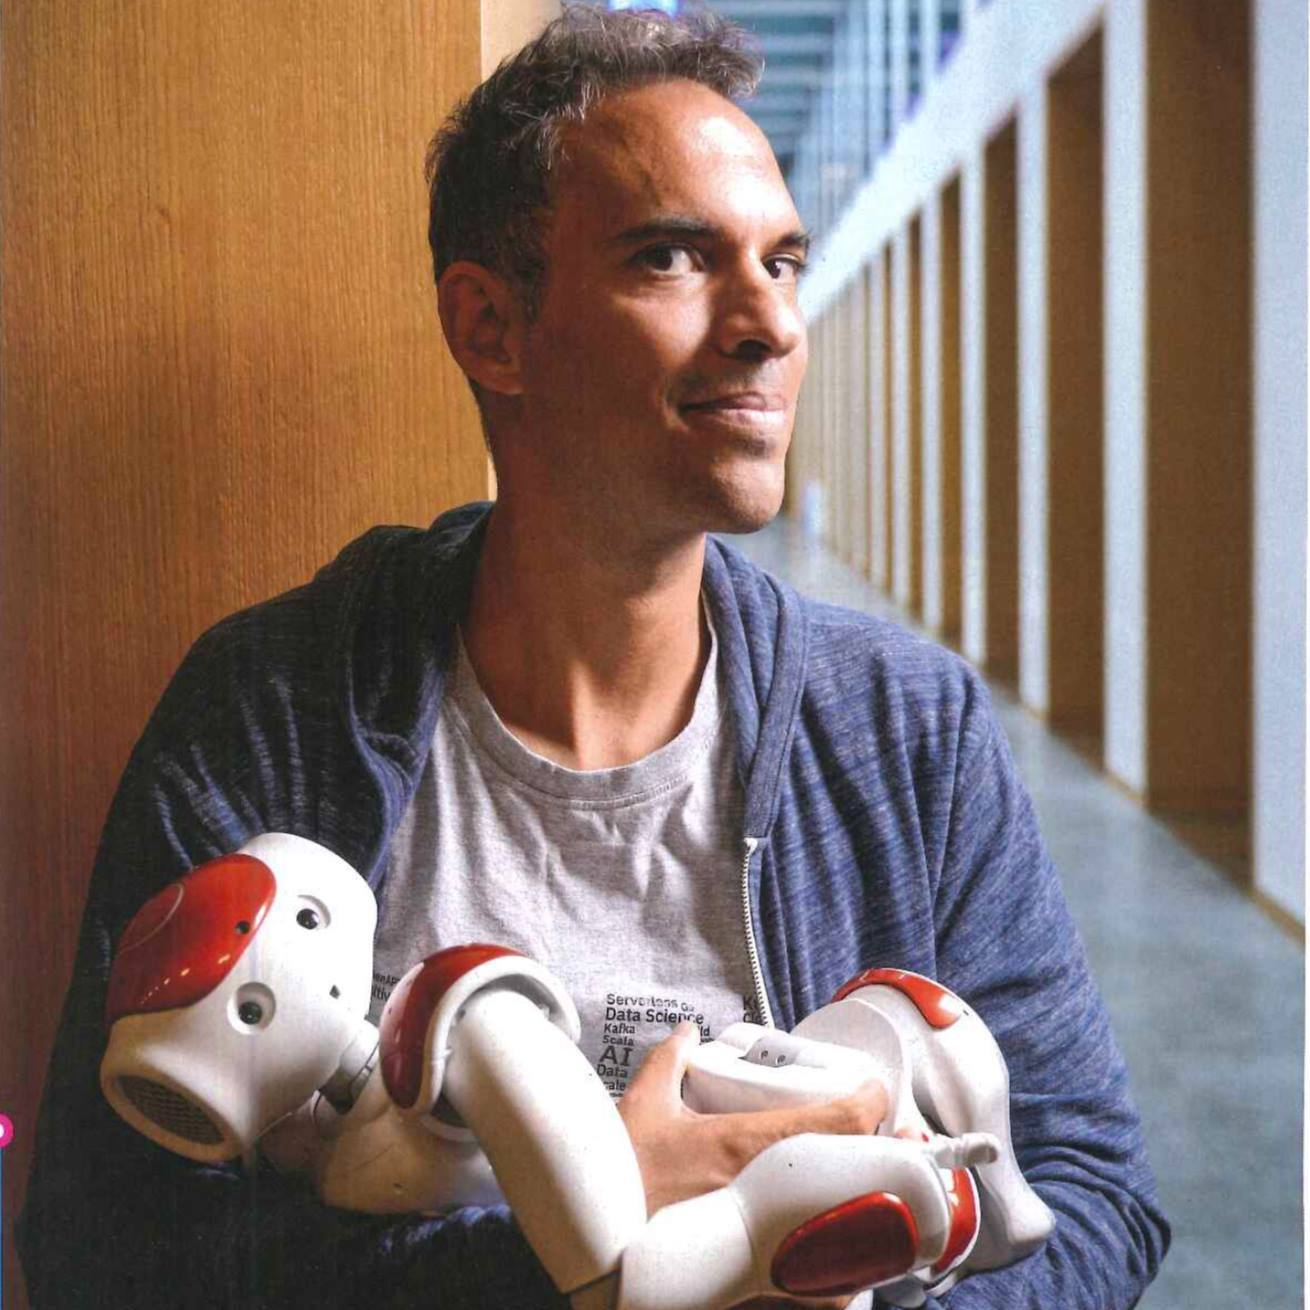</td>
    <td>Romeo Kienzler<br/>Chief Data Scientist<br/>IBM Center for Open Source Data and AI Technologies</td>
</tr></table></div>

# Recap: Quantum Physics
This is a very short intro to repeat the basic concepts

## Superposition
Definition: Any two (or more) quantum states can be superimposed resulting in another valid quantum state.

Example: A phton is in "spin up" and "spin down" state at the same time. Once measured it collapses into one state (cat state)


![](https://upload.wikimedia.org/wikipedia/commons/e/e2/Wigner_function_of_a_Schr%C3%B6dinger_cat_state.gif)

## Entanglement
Definition: Physical properties like position, momentum, spin, and polarization between two (or more) quantum particles are correlated
Example: When the spin of one of two photons entangled photons is measured, the spin of the other photon is oposite (spooky action at a distance)

![](https://upload.wikimedia.org/wikipedia/commons/2/2d/SPDC_figure.png)
[Spontaneous Parametric Down Conversion](https://en.wikipedia.org/wiki/Spontaneous_parametric_down-conversion) in a special type of (nonlinear) crystal can be used to produce entangled photons

# Quantum Computing Hardware
Photons make very bad Qubits. Therefore we need something else.

Idea: 
- Use a LC circuit, use superconducting materials and cool it down ![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/LC_parallel_simple.svg/440px-LC_parallel_simple.svg.png)
- LC circuit consists of inductance (L) (e.g. a coil) and a capacitor (C)
- Acts as electrical resonator (like a tuning fork)![tunig fork](https://upload.wikimedia.org/wikipedia/commons/b/b2/TuningFork659Hz.jpg)) 


## Superconducting Qubits - Transmon
Definition Superconductivity: Electrical resistance vanishes and magnetic flux fields are expelled

Result: A superconductive LC circuit will retain energy (once activated) for a very long period of time. Energy level correlates with frequency

Idea: Use two energy levels as two Qubit states

Problem: In a coil electrical flux is linear to voltage. Therefore, separation between quantum states is hard.

Solution: Using a [Josephson junction](https://en.wikipedia.org/wiki/Josephson_effect) instead of a coil to introduce a non-linear inductivity

![](https://angstromengineering.com/wp-content/uploads/2019/02/SEM-transmon-qubit-angstrom-engineering.jpg)

![](https://blog.qutech.nl/wp-content/uploads/2017/05/circuit_energy_levels-01.png)

# What is a Qubit?

## Recap: Classical bits

- How do we represent 9213?
- 9000+200+10+3 = 9213
- $ 9213 = (9*10^3)+(2*10^2)+(1*10^1)+(3*10^0) $
- $ 9213 = (1*2^{13})+(0*2^{12})+(0*2^{11})+(0*2^{10})+(1*2^9)+(1*2^8)+(1*2^7)+(1*2^6)+(1*2^5)+(1*2^4)+(1*2^3)+(1*2^2)+(0*2^1)+(1*2^0)$

## Exercise
Run the code below and try to produce the numer 123

In [1]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=7)

HTML(value='<pre>Binary    Decimal\n 0000000 = 0</pre>')

## The Qubit State
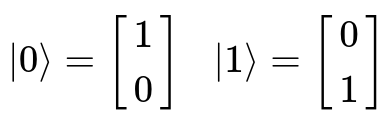

 and  Bracket notation by Dirac to indicate Qubit

## A more complex Qubit state
$ |q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix}$ 

### Recap: Linear Algebra
Matrix Addition:

$ |a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}, \quad     |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix} $

$ |a\rangle + |b\rangle = \begin{bmatrix}a_0 + b_0 \\ a_1 + b_1 \\ \vdots \\ a_n + b_n \end{bmatrix} $

Vector Scalar Multiplication:

$ x|a\rangle = \begin{bmatrix}x \times a_0 \\ x \times  a_1 \\ \vdots \\ x \times  a_n \end{bmatrix} $

Orthonormal Basis (orthogonal and normalised):

![](https://qiskit.org/textbook/ch-states/images/basis.svg)

$ |0\rangle $  and $ |1\rangle $ are linearly independent.

Because $ |0\rangle $  and $ |1\rangle $ span a orthonormal basis, we can represent any 2D vector with a combination of these two states. This allows us to write the state of our qubit in the alternative form:

$ |q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle$ 


## The Qubit Representation
So in general, a Qubit can be mathematically representated as:

 $ |q\rangle = \alpha|0\rangle + \beta|1\rangle $ 
 
 Please also note that $ \alpha $ and $ \beta $ are complex numbers: $ \alpha, \beta \in \mathbb{C} $

Congratulations! 

$ |q_0\rangle $ can be used to express *superposition* between two states. Note: The coefficients represent probability to find the Qubit in a specific state once measured. To obtain the probability we can use: $ p(|x\rangle) = | \langle x| \psi \rangle|^2 $. In other words, we need to square the coefficients to obtain a probability.

The following code will render a [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere) which is used to visualize the state of a Qubit:

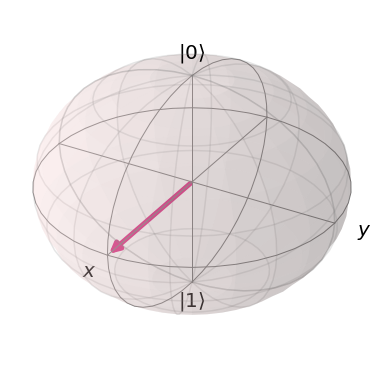

In [2]:
from qiskit_textbook.widgets import plot_bloch_vector
from math import pi
plot_bloch_vector([1, 0, 0]) 

## Exercise
Plot a qubit in the following states
1. $ |0\rangle $
1. $ |1\rangle $
1. $ \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $ 
1. $ \tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle) $
1. $ \tfrac{1}{\sqrt{2}}\begin{bmatrix}i\\1\end{bmatrix} $ 

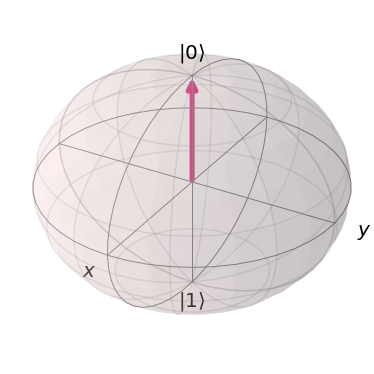

In [3]:
from qiskit_textbook.widgets import plot_bloch_vector
from math import pi
plot_bloch_vector([0, 0, 1]) 

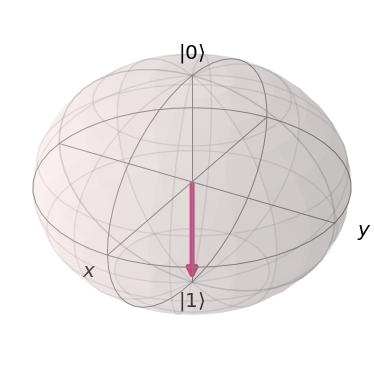

In [4]:
plot_bloch_vector([0, 0, -1]) 

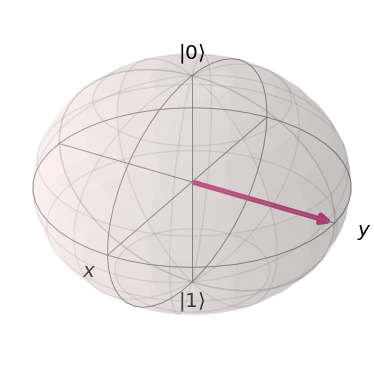

In [5]:
plot_bloch_vector([0, 1, 0]) 

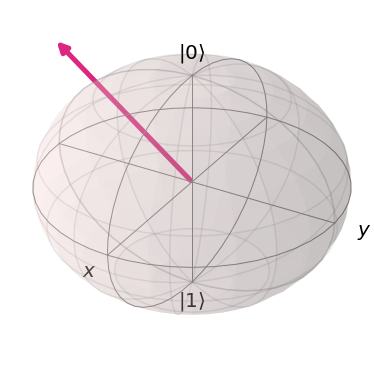

In [6]:
plot_bloch_vector([0, -1, 1]) 

Note that the state space of a Qubit is superior to the one of a classical bit. This should act as a little glimpse for you into the potential power of quantum computing.

## Exercise
1. [Create an account on the IBM Quantum Experience](https://quantum-computing.ibm.com?cm_mmc=Email_Events-_-Developer_Innovation-_-WW_WW-_-romeo-kienzler\CourseraCouraseAppliedAIusingDeepLearning\unknown\unknown\unknown\unknown\online\unknown&cm_mmca1=000019RS&cm_mmca2=10004805&cm_mmca3=M99938765&cvosrc=email.Events.M99938765&cvo_campaign=000019RS) (your registration will be tracked/analyzed in favour of myself) you can use [this link](https://quantum-computing.ibm.com) without being tracked
1. [Create your first quantum circuit](https://quantum-computing.ibm.com/docs/iqx/first-circuit)
1. [Code your first quantum circuit](https://quantum-computing.ibm.com/docs/iql/first-circuit) 

# Quantum Logic Gates

## Single Qubit Gates

### X-Gate
The X Gate can be viewed as a bit flip operator as it mirrors the state vector of a qubit up and down on the bloch sphere

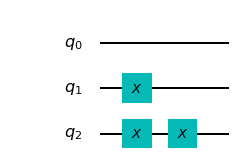

In [7]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
qc = QuantumCircuit(3)
qc.x(1)
qc.x(2)
qc.x(2)
qc.draw('mpl')

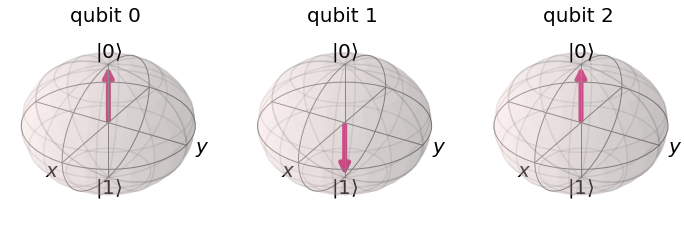

In [8]:
from qiskit.visualization import  plot_bloch_multivector
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### Y and Z Gate

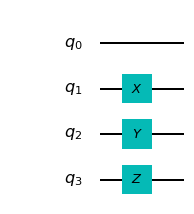

In [9]:
qc = QuantumCircuit(4)
qc.x(1)
qc.y(2) # Do Y-gate on qubit 0
qc.z(3) # Do Z-gate on qubit 0
qc.draw('mpl')

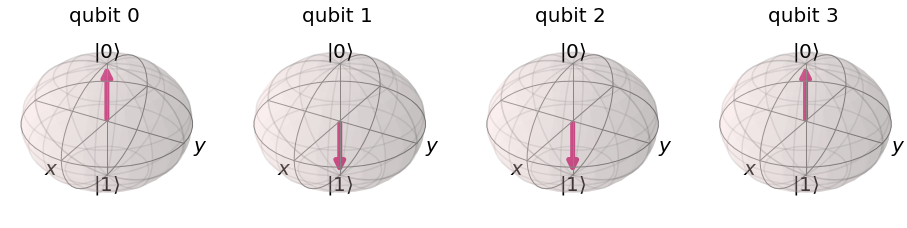

In [10]:
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### The Hadamard Gate
The Hadamard gate sets a single qubit into superposition

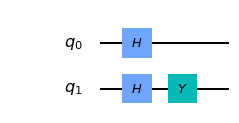

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.y(1)
qc.draw('mpl')

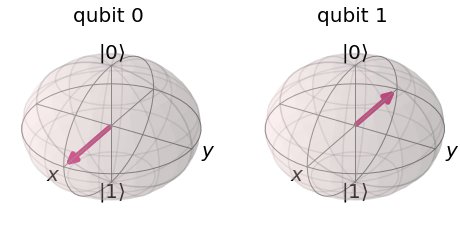

In [12]:
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

## Multi-Qubit States 

To describe the state of two qubits it requires four complex amplitudes. We store these amplitudes in a 4D-vector:

$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $

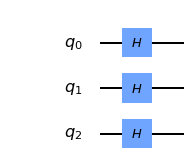

In [13]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

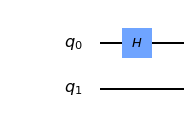

In [16]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [17]:
from qiskit_textbook.tools import array_to_latex
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [18]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

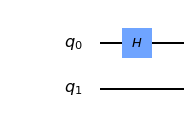

In [19]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [20]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

## Multi-Qubit Gates

### CNOT - Gate
Performs X - Gate on 2nd qubit if 1st (control9 qubit is one.

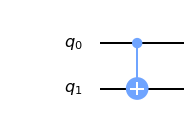

In [21]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')

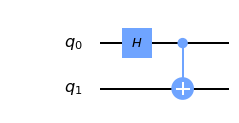

In [22]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [23]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

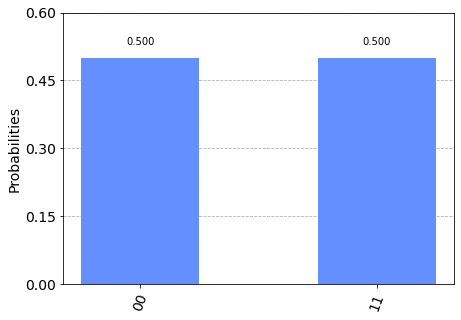

In [24]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)